<a href="https://colab.research.google.com/github/gjduart/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h5>Student: Gabriel Jonas da Silva Duarte</h5>

### Exercice of Machine Learning - IFCE - 2020.1

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

<h3>Loading and filtering the dataset</h3>

for training

In [ ]:
# Loading and Filtering the dataset for training
train_dataset = datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
idx = (train_dataset.targets==1) | (train_dataset.targets==3)
train_dataset.targets = train_dataset.targets[idx]
train_dataset.data = train_dataset.data[idx]

to test

In [ ]:
# Loading and Filtering the dataset for test
test_dataset = datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())
indx = (test_dataset.targets==1) | (test_dataset.targets==3)
test_dataset.targets = test_dataset.targets[indx]
test_dataset.data = test_dataset.data[indx]
test_dataset.data.shape

torch.Size([2145, 28, 28])

<h4>Treating data set and define new labels for the selected numbers</h4>

Test data: torch.Size([2145, 784])
Img class: 1.0


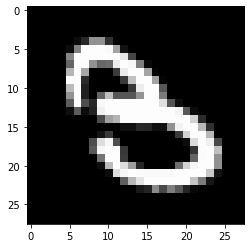

In [ ]:
n_training_samples = train_dataset.data.shape[0]
learning_rate = 1e-4 #Setting the learning rate


train_data = train_dataset.data.view(n_training_samples, -1) #Arranging in 28x28 vectors
train_targets = train_dataset.targets.view(n_training_samples, -1)
y_train = train_targets.float()
x_train = train_data.float()



y_train[y_train==1] = -1
y_train[y_train==3] = 1



n_test_samples = test_dataset.data.shape[0]
test_data = test_dataset.data.view(n_test_samples, -1)
test_targets = test_dataset.targets.view(n_test_samples, -1)

y_test = test_targets.float()
x_test = test_data.float()

y_test[y_test==1] = -1
y_test[y_test==3] = 1

import matplotlib.pyplot as plt

print('Test data:', x_test.shape)
print('Img class:', y_test[3].item())
img = test_data[3].view(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

$$h(\vec x) = logistic(\vec x^T \vec \theta)\\
            = \frac{1}{1+e^{\vec -x^T \vec \theta}}$$

ou seja $$P(y= +1/ \vec x) = h(\vec x) \\
           p(y = -1 / \vec x) = 1-h(\vec x)$$

<h3>O treinamento se dará através do maximum likelihood(Principio da máxima verossimilhança)</h3>

$$\hat{\vec \theta}_{ML} = argmax \prod_{n=1}^{N} P_{\vec \theta}(Y_n / \vec X_n)$$

$$= argmax \sum_{n=1}^{N} log\ P_{\vec \theta}(Y_n/\vec X_n)$$

$$P_{\vec \theta} = \left \{ \begin{matrix} logistic(\vec x^T\theta) & \mbox{, }\mbox{ y=1} \\ 1-logistic(\vec x^T\theta) & \mbox{, }\mbox{ y=-1} \end{matrix} \right.$$

Podendo ser Reescrito como equação unica.$$\\\boxed{P_{\vec \theta} = logistic(y\vec x^T\theta)} $$

In [ ]:
def train(x,y,n_epochs,learning_rate):
    theta = torch.zeros(784,1)
    for epoch in range(n_epochs):
        denominator = 1 + torch.exp(y*(x @ theta))
        numerator = y * x
        gradient = -torch.mean(numerator/denominator,axis=0, keepdim=True).T
        theta = theta - learning_rate* gradient
    return theta

In [ ]:
theta = train(x_train,y_train,100,learning_rate)


In [ ]:
#y_hat = 1/(1+torch.exp(-x_test@theta))
y_hat = torch.sigmoid(x_test@theta)

y_hat[y_hat < 0.5] = -1
y_hat[y_hat >= 0.5] = 1

correto = 0

for i in range(y_hat.shape[0]):
    if(y_hat[i] == y_test[i]):
        correto += 1
accuracy = 100 * correto/y_hat.shape[0]
accuracy
print("Aproach:", accuracy )

Aproach: 99.44055944055944


Para os pares a acurácia foi de aproximadamente: <br>
(5,7) = 99,2% <br>
(2,7) = 98%   <br>
(1,2) = 99.2% <br>
(1,3) = 99,4% <br>

a melhor acurácia foi para os pares de digitos (1,3) e a pior foi para os pares(2,7).